# Corrigez une série temporelle des variations saisonnières

## Exemple Y = Tendance + Saisonnalité + Résidu

In [48]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np
from seasonal import fit_seasons


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

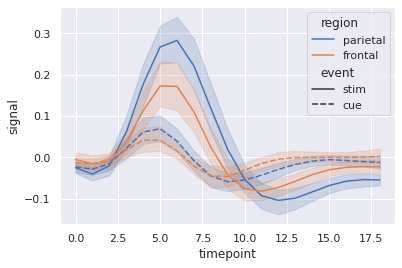

In [5]:

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [6]:
mois = list(range(1, 38)) # dernier 37 : janvier de la 3ème année

In [7]:
# Tendance
T = [(1+ 0.5 * t) for t in mois]


In [8]:
T

[1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5]

In [9]:
# Saisonnalité
S = [2*math.sin((t-1)*(2*math.pi)/12) for t in mois]


In [10]:
# Résidu
# modélisé par un bruit gaussien d'écart type 0.5
epsilon = np.random.normal(0,0.5,37)


In [11]:

M1 = np.add(T, S) 

M1

array([ 1.5       ,  3.        ,  4.23205081,  5.        ,  5.23205081,
        5.        ,  4.5       ,  4.        ,  3.76794919,  4.        ,
        4.76794919,  6.        ,  7.5       ,  9.        , 10.23205081,
       11.        , 11.23205081, 11.        , 10.5       , 10.        ,
        9.76794919, 10.        , 10.76794919, 12.        , 13.5       ,
       15.        , 16.23205081, 17.        , 17.23205081, 17.        ,
       16.5       , 16.        , 15.76794919, 16.        , 16.76794919,
       18.        , 19.5       ])

In [12]:
M = np.add(M1,epsilon)

In [13]:
M

array([ 1.73752017,  3.5635674 ,  3.86481302,  4.11814958,  4.97507195,
        4.54311019,  4.22238673,  3.28360767,  3.67321425,  4.45032554,
        4.3770869 ,  5.20271191,  8.1474734 ,  8.61652224, 10.34355744,
       11.3834082 , 10.02001085, 10.22135402, 10.7739415 ,  9.83969977,
       10.32105803,  9.45755744,  9.78369114, 12.52404534, 13.71444554,
       15.47516051, 15.77829162, 16.61181785, 17.70636779, 17.27809802,
       16.56864652, 15.40765576, 15.77265807, 16.42400317, 17.25874276,
       18.33061962, 19.89858328])

# Série temporelle complète

<AxesSubplot:xlabel='mois', ylabel='valeur'>

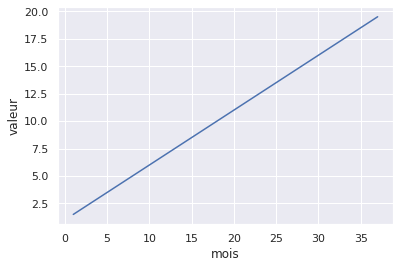

In [14]:
# Série temporelle complète

df = pd.DataFrame({"mois": mois,
                    "valeur" : T})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

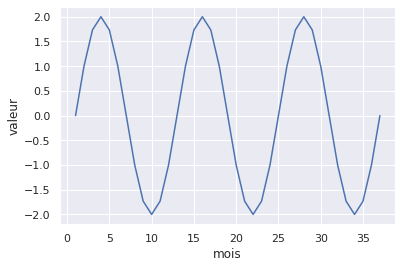

In [15]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : S})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

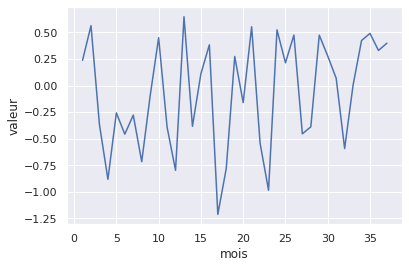

In [16]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : epsilon})
sns.lineplot(x="mois", y="valeur",data=df)

<AxesSubplot:xlabel='mois', ylabel='valeur'>

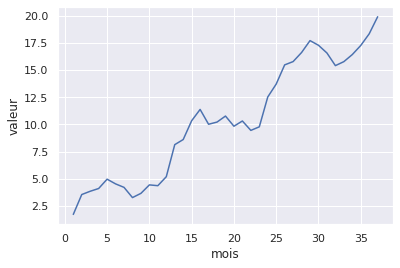

In [17]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : M})
sns.lineplot(x="mois", y="valeur",data=df)

In [18]:
from pylab import *

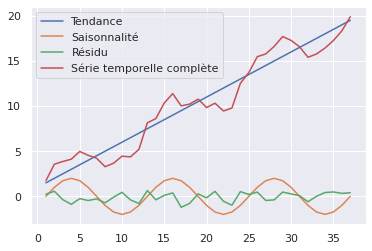

In [19]:

plot(mois, T , label="Tendance")
plot(mois, S , label="Saisonnalité")
plot(mois, epsilon , label="Résidu")
plot(mois, M , label = "Série temporelle complète")

plt.legend()



show()

# Courbe corrigée des variation saisonnières


<AxesSubplot:xlabel='mois', ylabel='valeur'>

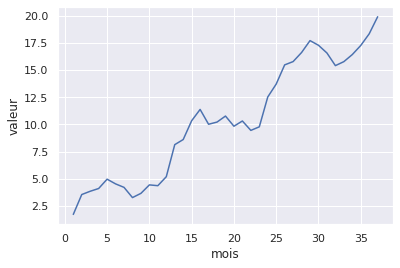

In [20]:
df = pd.DataFrame({"mois": mois,
                    "valeur" : M})
sns.lineplot(x="mois", y="valeur",data=df)



## courbe corrigée des variation à la main

<AxesSubplot:title={'center':'Courbe sans les variations saisonnières'}>

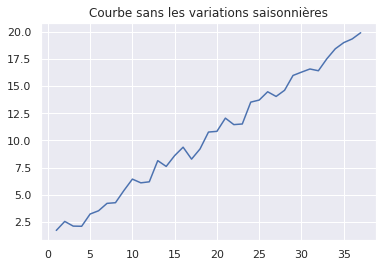

In [21]:
TB=[T[i]+epsilon[i] for i in range(len(T))]
# Courbe corrigée des variation saisonnièr
plt.title("Courbe sans les variations saisonnières")
sns.lineplot(x=mois, y=TB)

<AxesSubplot:title={'center':'Courbe  totale+ courbe sans saison + tendance'}>

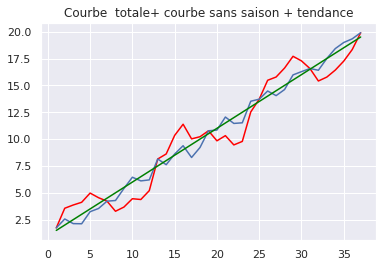

In [54]:
plt.title("Courbe  totale+ courbe sans saison + tendance")
sns.lineplot(x=mois, y=M, color='red')
sns.lineplot(x=mois, y=TB)
sns.lineplot(x=mois, y =T, color='green')


In [56]:
df=pd.DataFrame(zip(M,TB,T),columns=['courbe totale', 'tendance+bruit','tendance'])

<AxesSubplot:title={'center':'Etude de la série Temporelle'}>

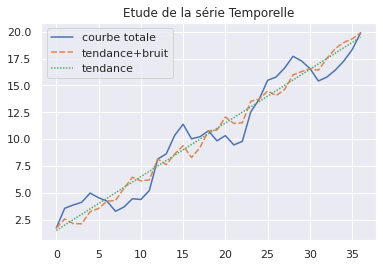

In [57]:
plt.title("Etude de la série Temporelle")
sns.lineplot(data=df)

## courbe corrigée des variation avec un algo de régression

In [22]:
X = pd.DataFrame({"mois": mois,
                    "valeur" : M})



X

,mois,valeur
0,1,1.737520
1,2,3.563567
2,3,3.864813
3,4,4.118150
4,5,4.975072
5,6,4.543110
6,7,4.222387
7,8,3.283608
8,9,3.673214
9,10,4.450326


In [23]:
t = [i for i in range(1,38)]

for i in range(12):
    su = np.repeat(0, repeats=12)
    su[i] = 1
    s = np.tile(su, 37 // len(su) + 1)[:37]
    vars()['s' + str(i+1)] = s

In [24]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(np.array([t, s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12]).transpose(), X['valeur'])

LinearRegression(fit_intercept=False)

In [25]:
a = np.mean(reg.coef_)
b = reg.coef_[0]
c = reg.coef_[1:13] - a

In [26]:
y_cvs =X['valeur']-(c[0]*s1+c[1]*s2+c[2]*s3+c[3]*s4+c[4]*s5+c[5]*s6+c[6]*s7+c[7]*s8+c[8]*s9+
                        c[9]*s10+c[10]*s11+c[11]*s12)

In [27]:
y_cvs

0      1.263077
1      2.177882
2      2.215456
3      2.273355
4      3.447719
5      3.748853
6      4.100791
7      4.686816
8      5.177900
9      6.280159
10     6.357842
11     6.150981
12     7.673031
13     7.230837
14     8.694201
15     9.538613
16     8.492657
17     9.427096
18    10.652346
19    11.242908
20    11.825743
21    11.287391
22    11.764446
23    13.472314
24    13.240003
25    14.089475
26    14.128935
27    14.767023
28    16.179014
29    16.483840
30    16.447051
31    16.810864
32    17.277343
33    18.253836
34    19.239497
35    19.278889
36    19.424141
Name: valeur, dtype: float64

<AxesSubplot:title={'center':'courbe desaisonnalisée avec reg lineaire'}, ylabel='valeur'>

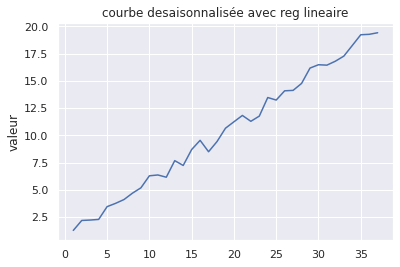

In [28]:
plt.title('courbe desaisonnalisée avec reg lineaire')
sns.lineplot(x=mois, y =y_cvs)

<AxesSubplot:title={'center':'Tendances avec un regplot'}, ylabel='valeur'>

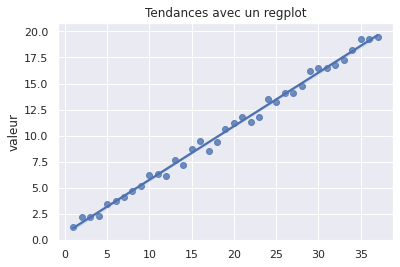

In [29]:
plt.title('Tendances avec un regplot')
sns.regplot(x=mois, y=y_cvs)

# tendance

In [30]:
reglin=linear_model.LinearRegression()

In [31]:
df1=pd.DataFrame(zip(mois,list(y_cvs)), columns=['mois','y_cvs'])

In [32]:
X=np.array(mois)
y=list(df1['y_cvs'])


In [33]:
reglin.fit(X.reshape(-1,1),y)

LinearRegression()

In [34]:
y_pred=reglin.predict(X.reshape(-1,1))

<AxesSubplot:title={'center':'Tendance récupérée avec la Regression lineaire'}>

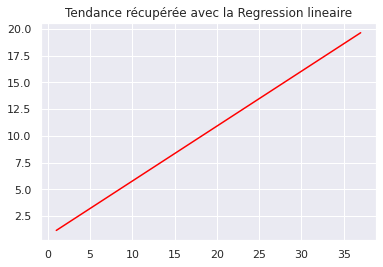

In [35]:
plt.title('Tendance récupérée avec la Regression lineaire')
yy=[reglin.intercept_*i+reglin.coef_ for i in mois]
sns.lineplot(x=mois,y=y_pred, color='red')

In [36]:
reglin.coef_
reglin.intercept_

0.6442021934391668

# à la main

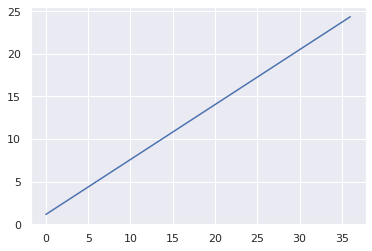

In [37]:
yy=[(reglin.intercept_*i+reglin.coef_)[0] for i in mois]
plt.plot(yy)

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [39]:
X = pd.DataFrame({"mois": mois,
                    "valeur" : M})

In [40]:
X = X.set_index('mois')

/tmp/ipykernel_8475/307699801.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp_x = seasonal_decompose(X,  model='multiplicative',freq=3)


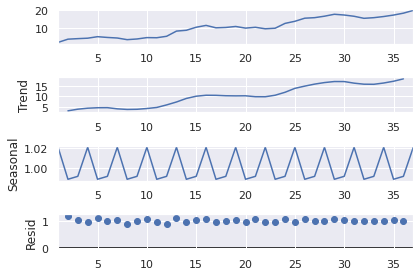

In [41]:
decomp_x = seasonal_decompose(X,  model='multiplicative',freq=3)
decomp_x.plot()
plt.show()

# avec fit season

In [42]:
seasons, trended = fit_seasons(X['valeur'])

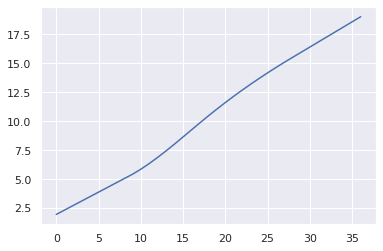

In [43]:
plt.plot(trended)

# calculons les différences

In [49]:
diff=[TB[i]-y_cvs[i] for i in range(len(TB))]

In [50]:
LA.norm(diff, ord=2)

1.6308736774156836

In [51]:
biais=sum([abs(y_cvs[i]-TB[i]) for i in range(len(TB))])/len(TB)

In [52]:
biais

0.23427453112318802

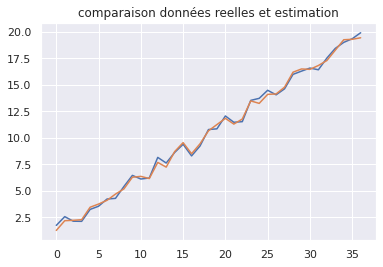

In [53]:
plt.title("comparaison données reelles et estimation")
plt.plot(TB)
plt.plot(y_cvs)